In [1]:
import pandas as pd 
import os 
import numpy as np 
from sklearn.model_selection import train_test_split
import cv2

In [2]:
path='data/training_data'
mylist=os.listdir(path)
images=[]
lables=[]
Noclass=len(mylist)

In [3]:
for i in range(0,len(mylist)):
    pics=os.listdir(path+'/'+str(i))
    for j in pics:
        img=cv2.imread(path+'/'+str(i)+'/'+j)
        img=cv2.resize(img,(32,32))
        images.append(img)
        lables.append(i)

In [4]:
len(images)

10334

In [5]:
len(lables)

10334

In [6]:
images=np.array(images)
lables=np.array(lables)

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(images,lables,test_size=0.3,random_state=42)

In [8]:
xtrain,xval,ytrain,yval=train_test_split(xtrain,ytrain,test_size=0.2)

In [9]:
samples=[]

In [10]:
def Process(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.equalizeHist(img)
    img=img/255
    return img

In [12]:
img=Process(xtrain[100])
img=cv2.resize(img,(200,200))
cv2.imshow("img",img)
cv2.waitKey(0)

-1

In [13]:
print("X_train shape:", xtrain.shape)
print("X_test shape:", xtest.shape)


X_train shape: (5786, 32, 32, 3)
X_test shape: (3101, 32, 32, 3)


In [14]:
xtrain=np.array(list(map(Process,xtrain)))

In [15]:
xtest=np.array(list(map(Process,xtest)))

In [16]:
xval=np.array(list(map(Process,xval)))

In [17]:
xtrain.shape

(5786, 32, 32)

In [18]:
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], xtrain.shape[2], 1)

In [19]:
xtrain.shape

(5786, 32, 32, 1)

In [20]:
xtest=xtest.reshape(xtest.shape[0],xtest.shape[1],xtest.shape[2],1)

In [21]:
xval=xval.reshape(xval.shape[0],xval.shape[1],xval.shape[2],1)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
datagen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=10)

In [25]:
datagen.fit(xtrain)

In [27]:
from tensorflow.keras.utils import to_categorical

In [29]:
ytrain=to_categorical(ytrain,Noclass)

In [30]:
ytest=to_categorical(ytest,Noclass)
yval=to_categorical(yval,Noclass)

In [31]:
from tensorflow.keras.models import Sequential


In [44]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [52]:

model=Sequential()
model.add(Conv2D(60,(5,5),input_shape=(32,32,1),activation='relu'))

In [53]:
model.add(Conv2D(60,(5,5),activation='relu'))

In [54]:
model.add(MaxPooling2D((2,2)))

In [55]:
model.add(Conv2D(30,(3,3),activation='relu'))

In [56]:
model.add(Conv2D(15,(3,3),activation='relu'))

In [57]:
model.add(Dropout(0.5))

In [58]:
model.add(Flatten())

In [59]:
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))

In [60]:
model.add(Dense(Noclass,activation='softmax'))

In [61]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 60)        1560      
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 60)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 15)          4065      
                                                                 
 dropout_2 (Dropout)         (None, 8, 8, 15)          0         
                                                      

In [64]:
history=model.fit_generator(datagen.flow(xtrain,ytrain,batch_size=32),epochs=10,steps_per_epoch=2000,validation_data=(xval,yval),shuffle=1)

C:\Users\Anonymous\AppData\Local\Temp\ipykernel_1152\4173949122.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(datagen.flow(xtrain,ytrain,batch_size=32),epochs=10,steps_per_epoch=2000,validation_data=(xval,yval),shuffle=1)


Epoch 1/10
2000/2000 [==============================] - 33s 17ms/step - loss: 0.3253 - accuracy: 0.8970 - val_loss: 0.0444 - val_accuracy: 0.9876


In [68]:
import matplotlib.pyplot as plt

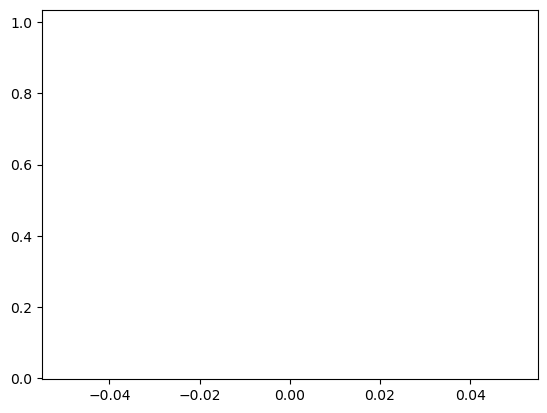

In [71]:
plt.figure(1)
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])

In [70]:
model.evaluate(xtest,ytest)

97/97 [==============================] - 4s 39ms/step - loss: 0.0405 - accuracy: 0.9861


[0.04047998785972595, 0.9861335158348083]

In [76]:
# Save the model in HDF5 format
model.save("model.h5")
